4.35
A)

In [1]:
import numpy as np
import scipy.stats as stats

flow_125 = [2.7, 2.6, 4.6, 3.2, 3.0, 3.8]
flow_160 = [4.6, 4.9, 5.0, 4.2, 3.6, 4.2]
flow_200 = [4.6, 2.9, 3.4, 3.5, 4.1, 5.1]

F_statistic, p_value = stats.f_oneway(flow_125, flow_160, flow_200)

alpha = 0.05
print("F-statistic:", F_statistic)
print("p-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis: Flow rate affects etch uniformity.")
else:
    print("Fail to reject the null hypothesis: No significant effect of flow rate on etch uniformity.")


F-statistic: 3.5856269113149857
p-value: 0.05336512592803552
Fail to reject the null hypothesis: No significant effect of flow rate on etch uniformity.


Fail to reject the null hypothesis: No significant effect of flow rate on etch uniformity.

B)

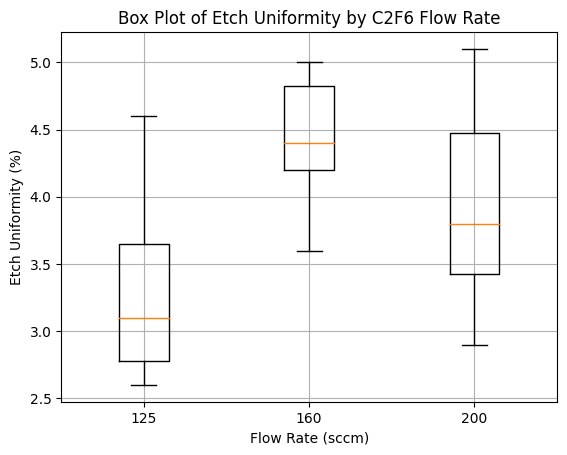

In [2]:
import matplotlib.pyplot as plt

data = [flow_125, flow_160, flow_200]
labels = ['125', '160', '200']

plt.boxplot(data, labels=labels)
plt.title('Box Plot of Etch Uniformity by C2F6 Flow Rate')
plt.ylabel('Etch Uniformity (%)')
plt.xlabel('Flow Rate (sccm)')
plt.grid()
plt.show()


C)

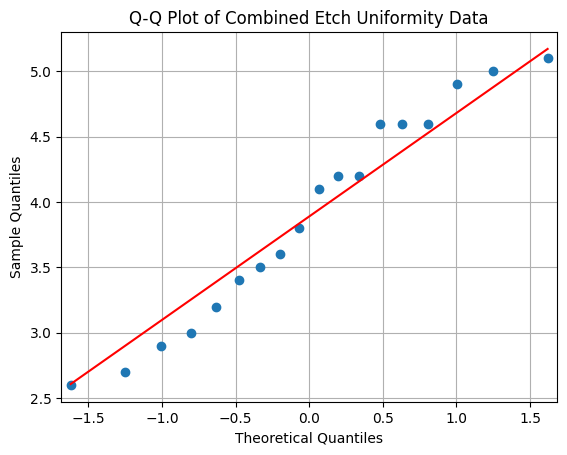

In [8]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

flow_125 = [2.7, 2.6, 4.6, 3.2, 3.0, 3.8]
flow_160 = [4.6, 4.9, 5.0, 4.2, 3.6, 4.2]
flow_200 = [4.6, 2.9, 3.4, 3.5, 4.1, 5.1]

uniformity_combined = flow_125 + flow_160 + flow_200

uniformity_combined = np.array(uniformity_combined)

sm.qqplot(uniformity_combined, line='s')
plt.title('Q-Q Plot of Combined Etch Uniformity Data')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid()
plt.show()

D)
Since the data is close to the line we can assume normality

4.36

In [9]:
import numpy as np
from scipy import stats

flow_125 = [2.7, 2.6, 4.6, 3.2, 3.0, 3.8]
flow_160 = [4.6, 4.9, 5.0, 4.2, 3.6, 4.2]
flow_200 = [4.6, 2.9, 3.4, 3.5, 4.1, 5.1]

mean_125 = np.mean(flow_125)
mean_160 = np.mean(flow_160)
mean_200 = np.mean(flow_200)

print("Mean Uniformity for Flow 125:", mean_125)
print("Mean Uniformity for Flow 160:", mean_160)
print("Mean Uniformity for Flow 200:", mean_200)

t_125_160 = stats.ttest_ind(flow_125, flow_160)
t_125_200 = stats.ttest_ind(flow_125, flow_200)
t_160_200 = stats.ttest_ind(flow_160, flow_200)

print("T-test between Flow 125 and Flow 160:", t_125_160)
print("T-test between Flow 125 and Flow 200:", t_125_200)
print("T-test between Flow 160 and Flow 200:", t_160_200)

p_values = [t_125_160.pvalue, t_125_200.pvalue, t_160_200.pvalue]
alpha = 0.05 / len(p_values)  # Bonferroni correction

adjusted_p_values = [p < alpha for p in p_values]
print("Adjusted p-values:", adjusted_p_values)


Mean Uniformity for Flow 125: 3.316666666666667
Mean Uniformity for Flow 160: 4.416666666666667
Mean Uniformity for Flow 200: 3.9333333333333336
T-test between Flow 125 and Flow 160: TtestResult(statistic=-2.9202396357403257, pvalue=0.015294197001820081, df=10.0)
T-test between Flow 125 and Flow 200: TtestResult(statistic=-1.349789758764916, pvalue=0.20684427155818652, df=10.0)
T-test between Flow 160 and Flow 200: TtestResult(statistic=1.2157432436359241, pvalue=0.2520033440109725, df=10.0)
Adjusted p-values: [True, False, False]


T-test between Flow 125 and Flow 160: TtestResult(statistic=-2.9202396357403257, pvalue=0.015294197001820081, df=10.0)
T-test between Flow 125 and Flow 200: TtestResult(statistic=-1.349789758764916, pvalue=0.20684427155818652, df=10.0)
T-test between Flow 160 and Flow 200: TtestResult(statistic=1.2157432436359241, pvalue=0.2520033440109725, df=10.0)

There is not a major differneces in the means execpt for flow 125 vs 160 where the p value indicates there is a significant difference in the means

4.53

In [10]:
import numpy as np
import scipy.stats as stats

sample_mean = 31.400
hypothesized_mean = 30
standard_deviation = 1.3
sample_size = 15
degrees_of_freedom = sample_size - 1

standard_error = standard_deviation / np.sqrt(sample_size)
z_statistic = (sample_mean - hypothesized_mean) / standard_error
print("Z-statistic:", z_statistic)

p_value = 2 * (1 - stats.norm.cdf(z_statistic))
print("P-value:", p_value)

t_values = [2.30, 3.41, 1.98, 1.55]
upper_bounds = {}

for t in t_values:
    p_t = 2 * (1 - stats.t.cdf(t, df=degrees_of_freedom))
    upper_bounds[t] = p_t

for t, p_bound in upper_bounds.items():
    print(f"Upper bound on P-value for t = {t}: {p_bound:.4f}")


Z-statistic: 4.170905142069522
P-value: 3.033921428419184e-05
Upper bound on P-value for t = 2.3: 0.0374
Upper bound on P-value for t = 3.41: 0.0042
Upper bound on P-value for t = 1.98: 0.0677
Upper bound on P-value for t = 1.55: 0.1434


Z-statistic: 4.170905142069522
P-value: 3.033921428419184e-05
Upper bound on P-value for t = 2.3: 0.0374
Upper bound on P-value for t = 3.41: 0.0042
Upper bound on P-value for t = 1.98: 0.0677
Upper bound on P-value for t = 1.55: 0.1434

4.47

In [12]:
pip install statsmodels pandas


In [13]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

bhp = [225, 212, 229, 222, 219, 278, 246, 237, 233, 224, 223, 230]
rpm = [2000, 1800, 2400, 1900, 1600, 2500, 3000, 3200, 2800, 3400, 1800, 2500]
octane = [90, 94, 88, 91, 86, 96, 94, 90, 88, 86, 90, 89]
compression = [100, 95, 110, 96, 100, 110, 98, 100, 105, 97, 100, 104]

data = pd.DataFrame({
    'bhp': bhp,
    'rpm': rpm,
    'octane': octane,
    'compression': compression
})

X = data[['rpm', 'octane', 'compression']]
X = sm.add_constant(X)
y = data['bhp']

model = sm.OLS(y, X).fit()

print("Regression Results:")
print(model.summary())


print("\nT-tests for each regressor:")
print(model.pvalues)


significant_regressors = model.pvalues[model.pvalues < 0.05].index
print("\nSignificant regressors at alpha = 0.05:")
print(significant_regressors)


Regression Results:
                            OLS Regression Results                            
Dep. Variable:                    bhp   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     11.12
Date:                Thu, 19 Sep 2024   Prob (F-statistic):            0.00317
Time:                        22:58:27   Log-Likelihood:                -40.708
No. Observations:                  12   AIC:                             89.42
Df Residuals:                       8   BIC:                             91.36
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -266.0312     92.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  res = hypotest_fun_out(*samples, **kwds)


The p-value for the f test is 0.00317. Since this p-value is less than 0.05, we reject the null hypothesis that all regression coefficients are equal to zero. This indicates that at least one of the predictors is significantly related to bhp, confirming that the overall regression model is significant.
Since all p-values for the predictors are below 0.05, each of these variables is statistically significant at the 5% level. The R-squared model explains a substantial proportion of the variance in bhp.
